In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
import pickle

from mlptools.io.read import read_from_format

In [21]:
path2data = '/Users/y1u0d2/desktop/Lab/data/qe_data/Si'

all_data = []
for mp_dir in glob(f'{path2data}/mp*'):
    # get all directories
    all_data += glob(f'{mp_dir}/*')

all_atoms = []
for path in all_data:
    path2pkl = os.path.join(path, 'mlpatoms.pkl')
    if not os.path.exists(path2pkl):
        continue
    with open(os.path.join(path, 'mlpatoms.pkl'), "rb") as f:
        all_atoms.append(pickle.load(f))

## Plot energy per atom distribution with respect to volume per atom

In [22]:
energy_data = []
blacklist = ['mp-149_dimer', 'mp-three', 'mp-four', 'mp-slab']

for atoms in all_atoms:
    if atoms.structure_id in blacklist:
        continue
    energy_data.append([atoms.structure_id, atoms.get_atomic_energy(), atoms.get_atomic_volume()])

energy_df = pd.DataFrame(energy_data, columns=['structure_id', 'energy', 'volume'])

In [24]:
energy_df.head()

,structure_id,energy,volume
0,mp-165,-635.155101,26.016781
1,mp-165,-633.343536,27.533781
2,mp-165,-633.797540,14.398938
3,mp-165,-633.793161,18.286313
4,mp-165,-635.283487,24.014094


Text(0, 0.5, 'Energy (eV)')

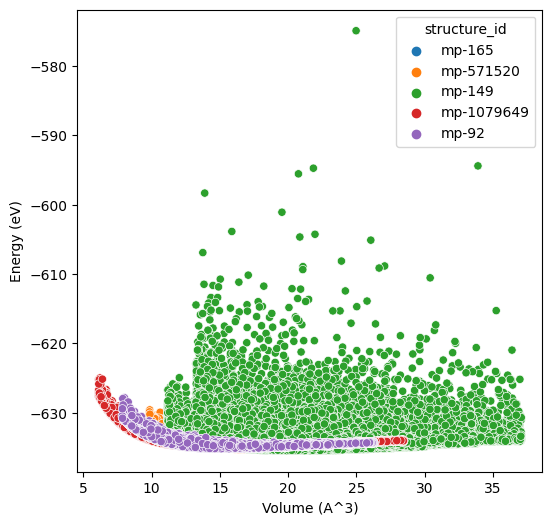

In [30]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

sns.scatterplot(x='volume', y='energy', data=energy_df, hue='structure_id', ax=ax)
ax.set_xlabel('Volume (A^3)')
ax.set_ylabel('Energy (eV)')

## Plot force distribution

In [52]:
force_data = []

for atoms in all_atoms:
    structure_id_list = np.full((atoms.n_atoms, 1), atoms.structure_id)
    force_data.append(np.hstack([structure_id_list, atoms.force]))

force_data = np.vstack(force_data)
force_df = pd.DataFrame(force_data, columns=['structure_id', 'force_x', 'force_y', 'force_z'])
force_df[['force_x', 'force_y', 'force_z']] = force_df[['force_x', 'force_y', 'force_z']].astype(float)

Text(0, 0.5, 'Force y (eV/A)')

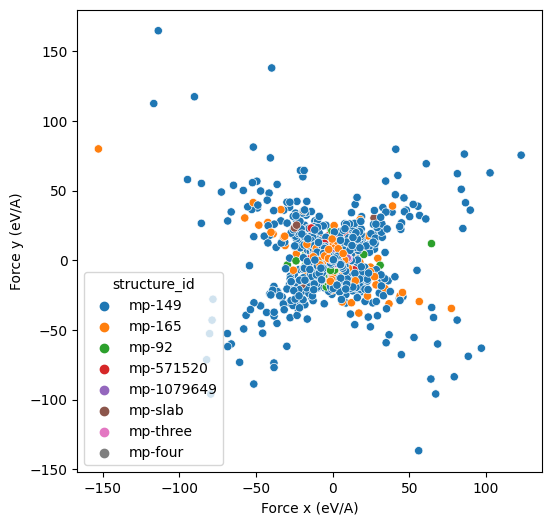

In [53]:
np.random.seed(0)
force_df_sampled = force_df.sample(5000)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
sns.scatterplot(x='force_x', y='force_y', data=force_df_sampled, hue='structure_id', ax=ax)
ax.set_xlabel('Force x (eV/A)')
ax.set_ylabel('Force y (eV/A)')

## Plot dimer

In [56]:
dimer_atoms = list(filter(lambda x: x.structure_id == 'mp-149_dimer', all_atoms))
print(f"There're {len(dimer_atoms)} dimer structures.")

There're 96 dimer structures.


In [63]:
from mlptools.utils.constants import ZERO_POINT_ENERGY

distance_and_energy = [[dimer.get_atomic_distance(), dimer.energy] for dimer in dimer_atoms]
distance_and_energy_df = pd.DataFrame(distance_and_energy, columns=['distance', 'energy']).sort_values('distance').reset_index(drop=True)
distance_and_energy_df['shifted_energy'] = distance_and_energy_df['energy'] - 2 * ZERO_POINT_ENERGY

Text(0, 0.5, 'Energy (eV)')

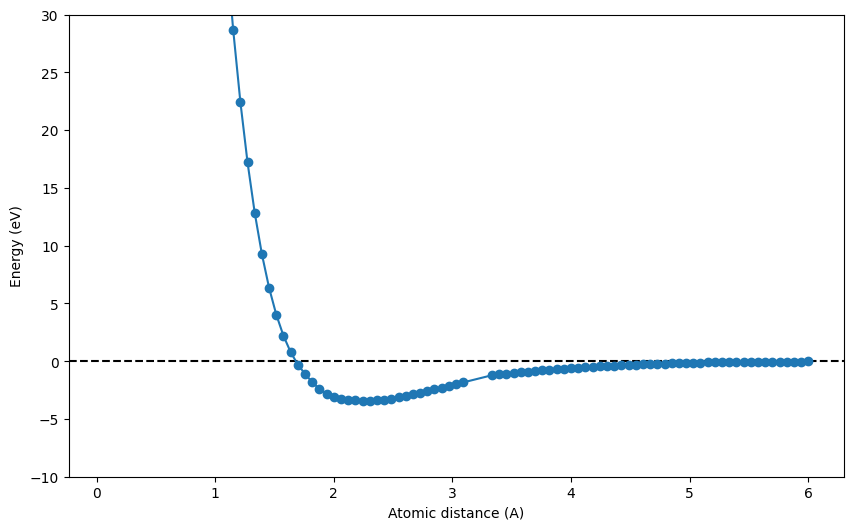

In [68]:
# plot energy with respect to atomic distance

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

# plot horizontal line
ax.axhline(y=0, color='k', linestyle='--')

# ax.plot(distance_and_energy_df['distance'], distance_and_energy_df['energy'], 'o-')
ax.plot(distance_and_energy_df['distance'], distance_and_energy_df['shifted_energy'], 'o-')

ax.set_ylim(-10, 30)
ax.set_xlabel('Atomic distance (A)')
ax.set_ylabel('Energy (eV)')